In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,f1_score,recall_score,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import warnings

warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(400, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [6]:
df=df.drop(columns=["id"])

In [7]:
convert_columns=["pcv","wc","rc"]

for col in convert_columns:
  df[col]=pd.to_numeric(df[col],errors="coerce")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              294 non-null    float64
 17  rc              269 non-null    flo

In [9]:
df.isna().sum()

,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4
bgr,44


In [10]:
num_cols=df.select_dtypes(include="float64").columns
cat_cols=df.select_dtypes(include="object").columns

In [11]:
for cols in num_cols:
  df[cols]=df[cols].fillna(df[cols].mean())

for cols in cat_cols:
  df[cols]=df[cols].fillna(df[cols].mode()[0])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    object 
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    float64
 16  wc              400 non-null    float64
 17  rc              400 non-null    flo

- Standardizing categorical values to remove any whitespace,unwanted characters and have the same case for all values.


In [13]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

age: [48.          7.         62.         51.         60.         68.
 24.         52.         53.         50.         63.         40.
 47.         61.         21.         42.         75.         69.
 51.48337596 73.         70.         65.         76.         72.
 82.         46.         45.         35.         54.         11.
 59.         67.         15.         55.         44.         26.
 64.         56.          5.         74.         38.         58.
 71.         34.         17.         12.         43.         41.
 57.          8.         39.         66.         81.         14.
 27.         83.         30.          4.          3.          6.
 32.         80.         49.         90.         78.         19.
  2.         33.         36.         37.         23.         25.
 20.         29.         28.         22.         79.        ]
bp: [ 80.          50.          70.          90.          76.46907216
 100.          60.         110.         140.         180.
 120.        ]
sg: [1.02 

In [14]:
weird_values = ["?", "unknown", "n/a", "na", "--", "", "" "", "nan","\t"]
df.replace(weird_values, np.nan, inplace=True)

for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype(str)
    df[col] = df[col].str.replace(r"\s+", "", regex=True)
    df[col] = df[col].str.lower()


for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [15]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

age: [48.          7.         62.         51.         60.         68.
 24.         52.         53.         50.         63.         40.
 47.         61.         21.         42.         75.         69.
 51.48337596 73.         70.         65.         76.         72.
 82.         46.         45.         35.         54.         11.
 59.         67.         15.         55.         44.         26.
 64.         56.          5.         74.         38.         58.
 71.         34.         17.         12.         43.         41.
 57.          8.         39.         66.         81.         14.
 27.         83.         30.          4.          3.          6.
 32.         80.         49.         90.         78.         19.
  2.         33.         36.         37.         23.         25.
 20.         29.         28.         22.         79.        ]
bp: [ 80.          50.          70.          90.          76.46907216
 100.          60.         110.         140.         180.
 120.        ]
sg: [1.02 

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])

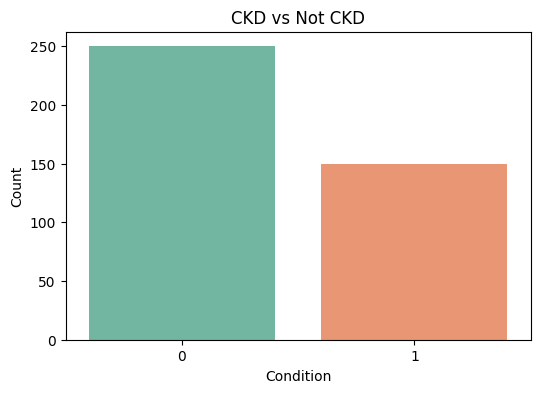

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="classification", palette="Set2")
plt.title("CKD vs Not CKD")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.show()

- Univariate Feature Distributions (Numerical Columns) to help with Understanding the distribution of each feature (normal, skewed, etc.) and spot outliers



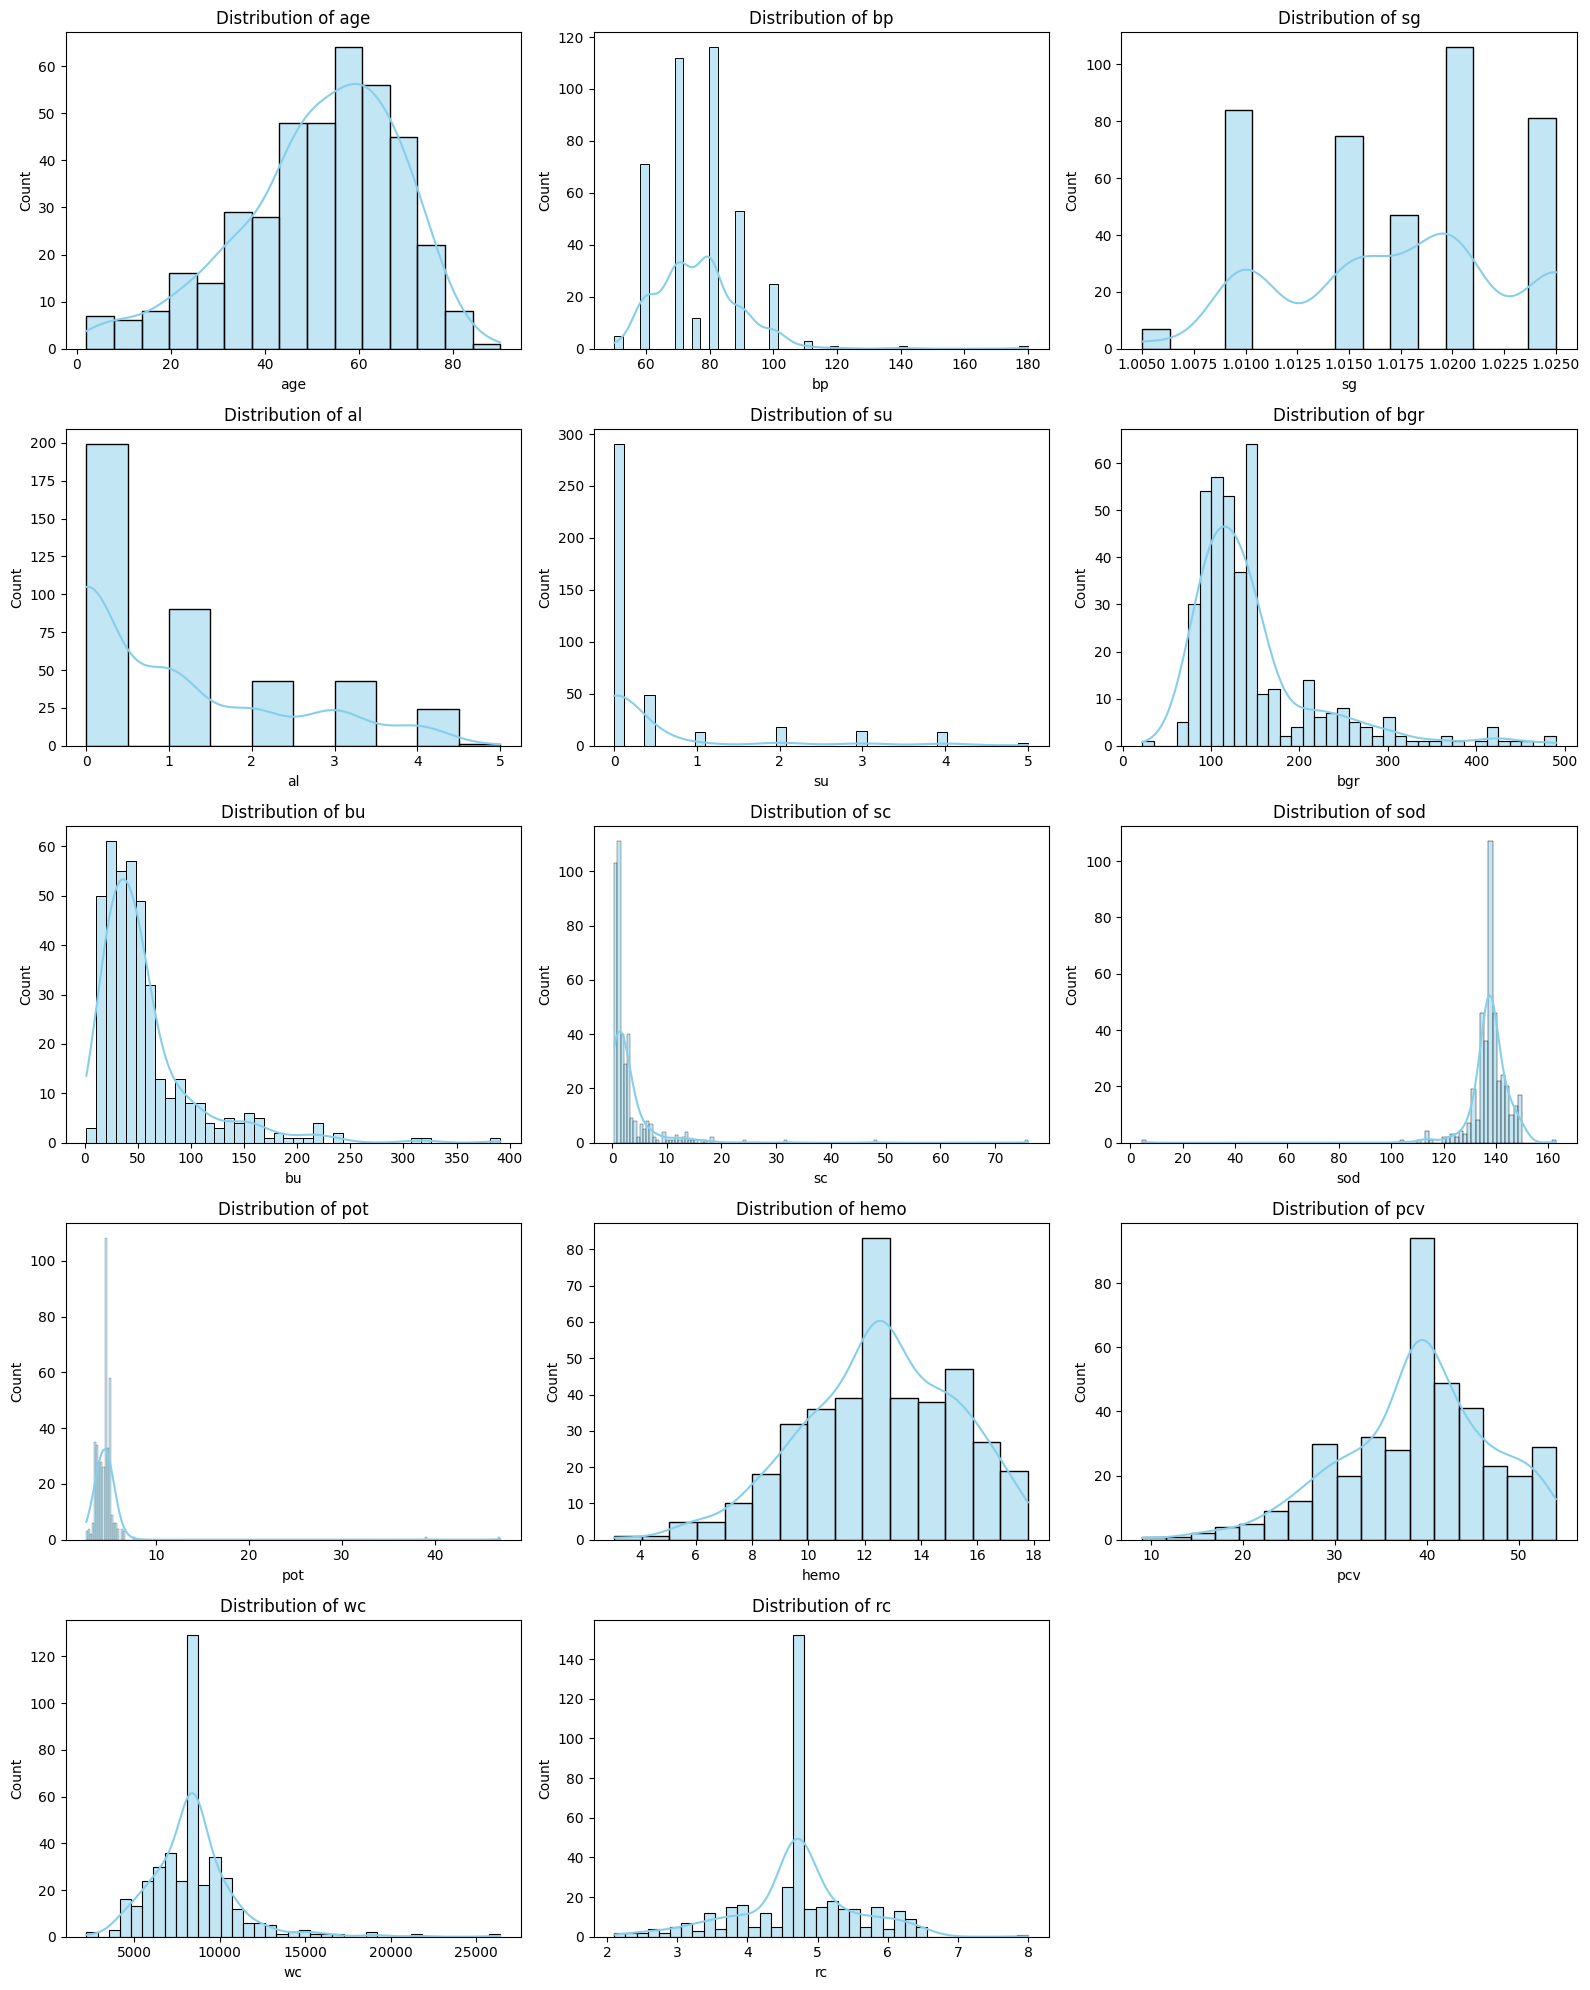

In [18]:
num_cols=df.select_dtypes(include="float64").columns
num_rows=int(np.ceil(len(num_cols)/3))

plt.figure(figsize=(16, 4*num_rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

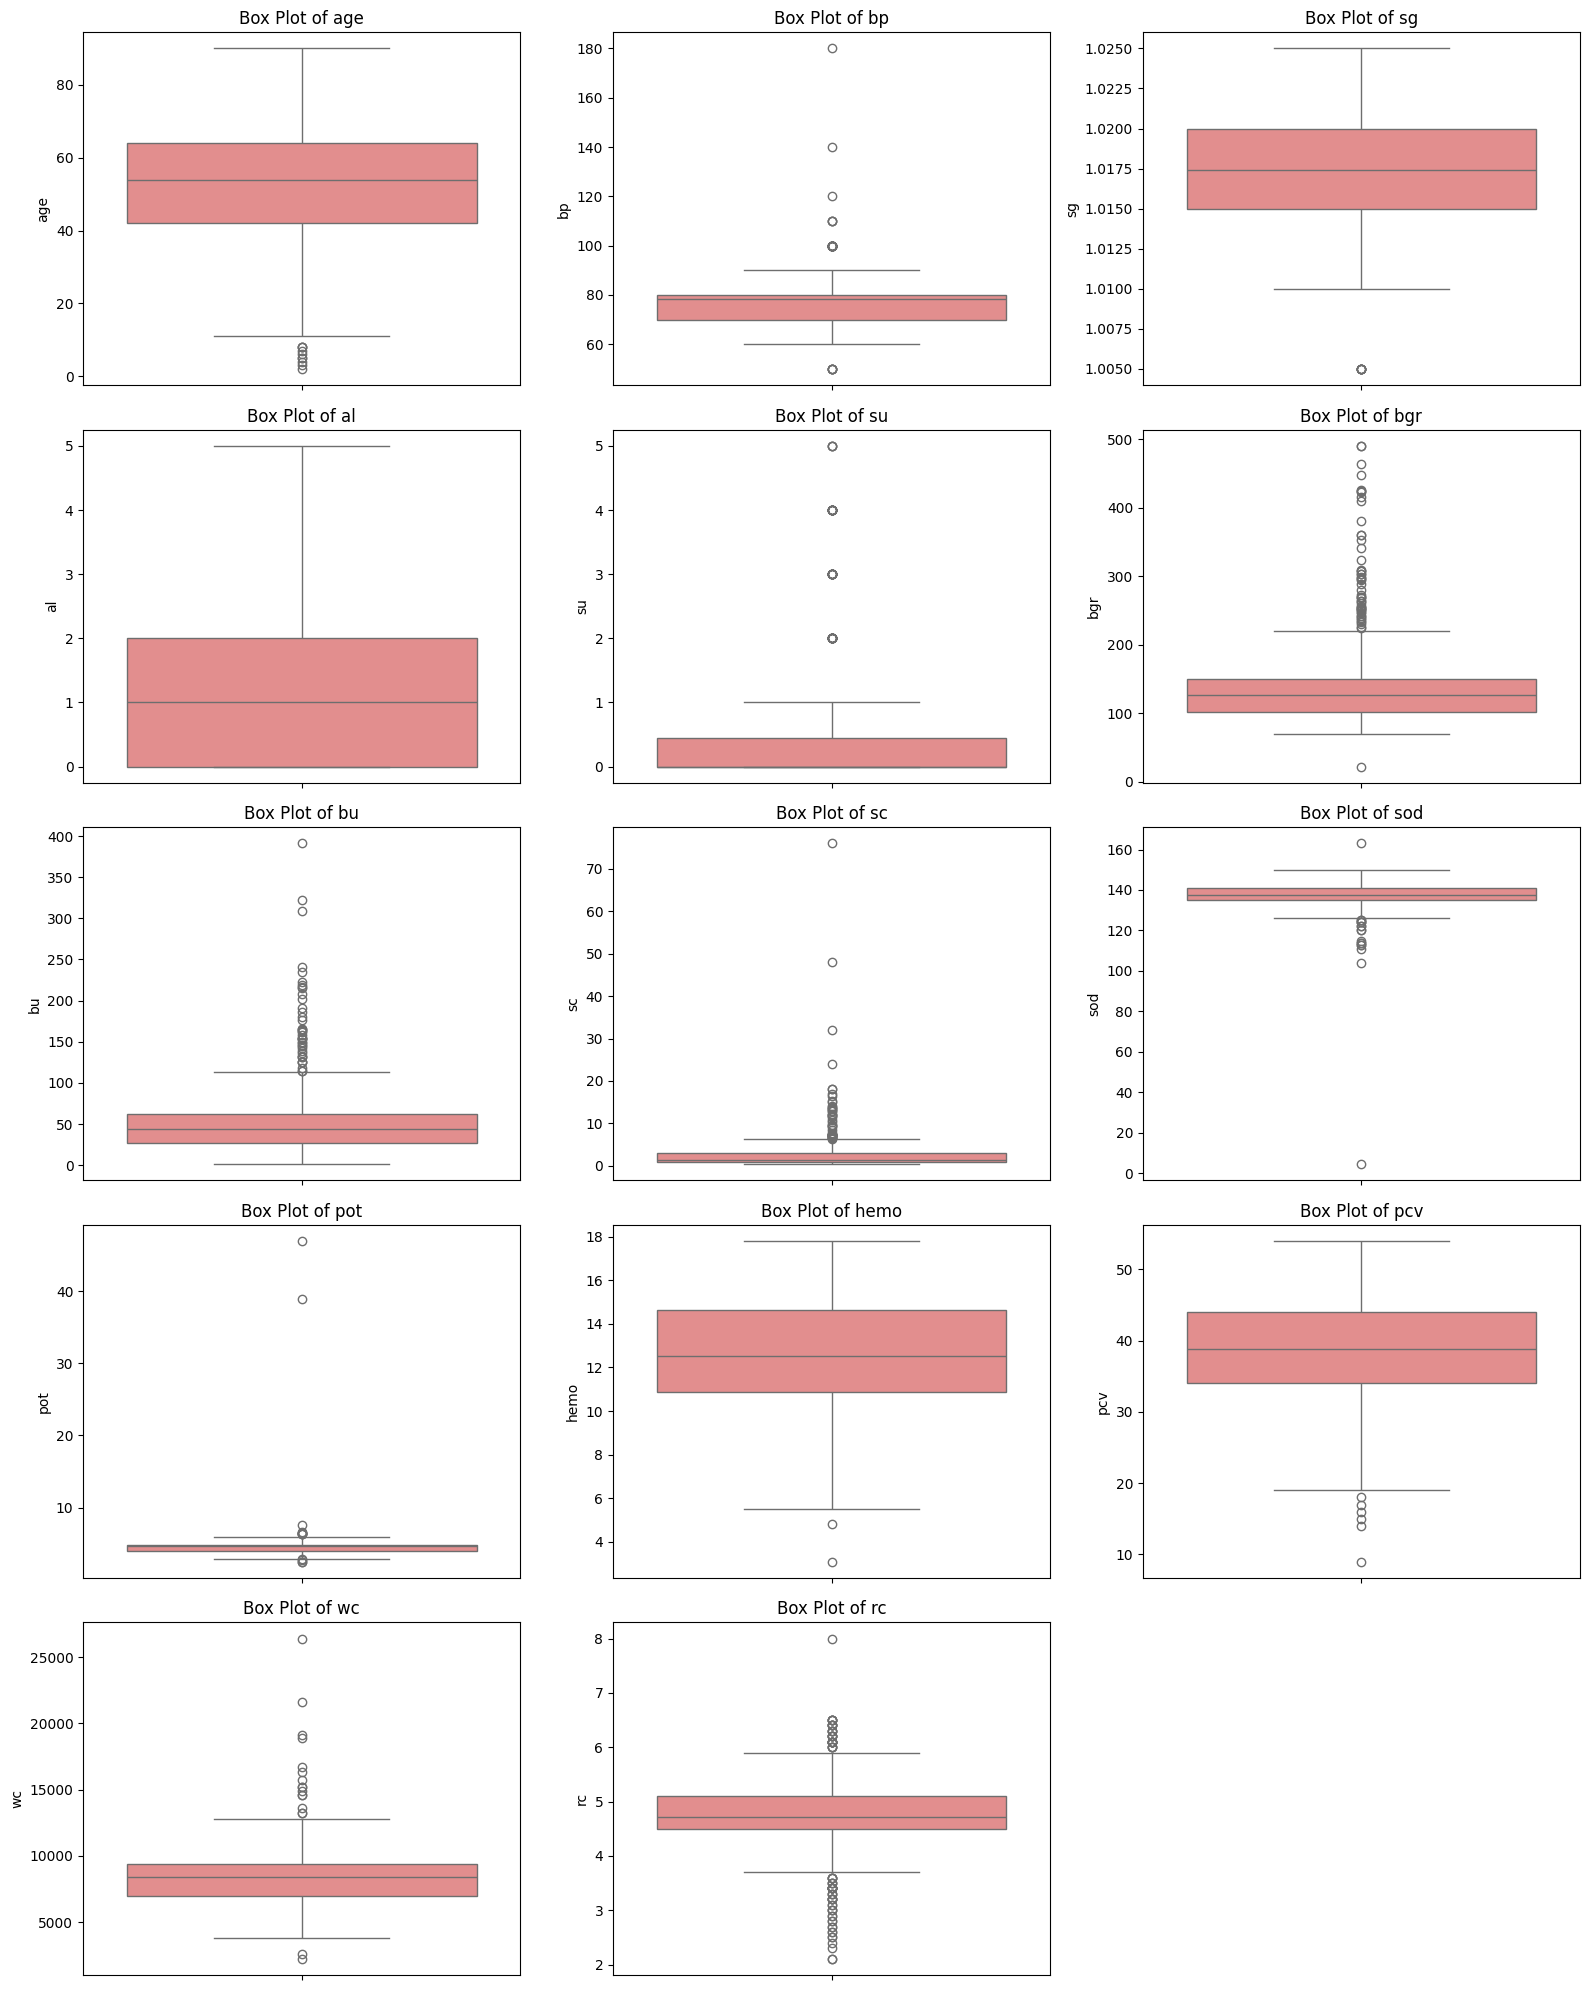

In [19]:
plt.figure(figsize=(16, 4 * num_rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(data=df, y=col, color='lightcoral')
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()

In [20]:
def handle_outliers(df, columns):
    for col in columns:
      if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers=df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        if outliers.any().any():
          print(f"{col}: has outliers")
          df[col]=np.where(df[col]>upper_bound,upper_bound,
                           np.where(df[col]<lower_bound,lower_bound,df[col]))
      else:
        print(f"{col}: has no outliers")
    return df

num_cols=df.select_dtypes(include="float64").columns
df=handle_outliers(df,num_cols)

age: has outliers
bp: has outliers
sg: has outliers
su: has outliers
bgr: has outliers
bu: has outliers
sc: has outliers
sod: has outliers
pot: has outliers
hemo: has outliers
pcv: has outliers
wc: has outliers
rc: has outliers


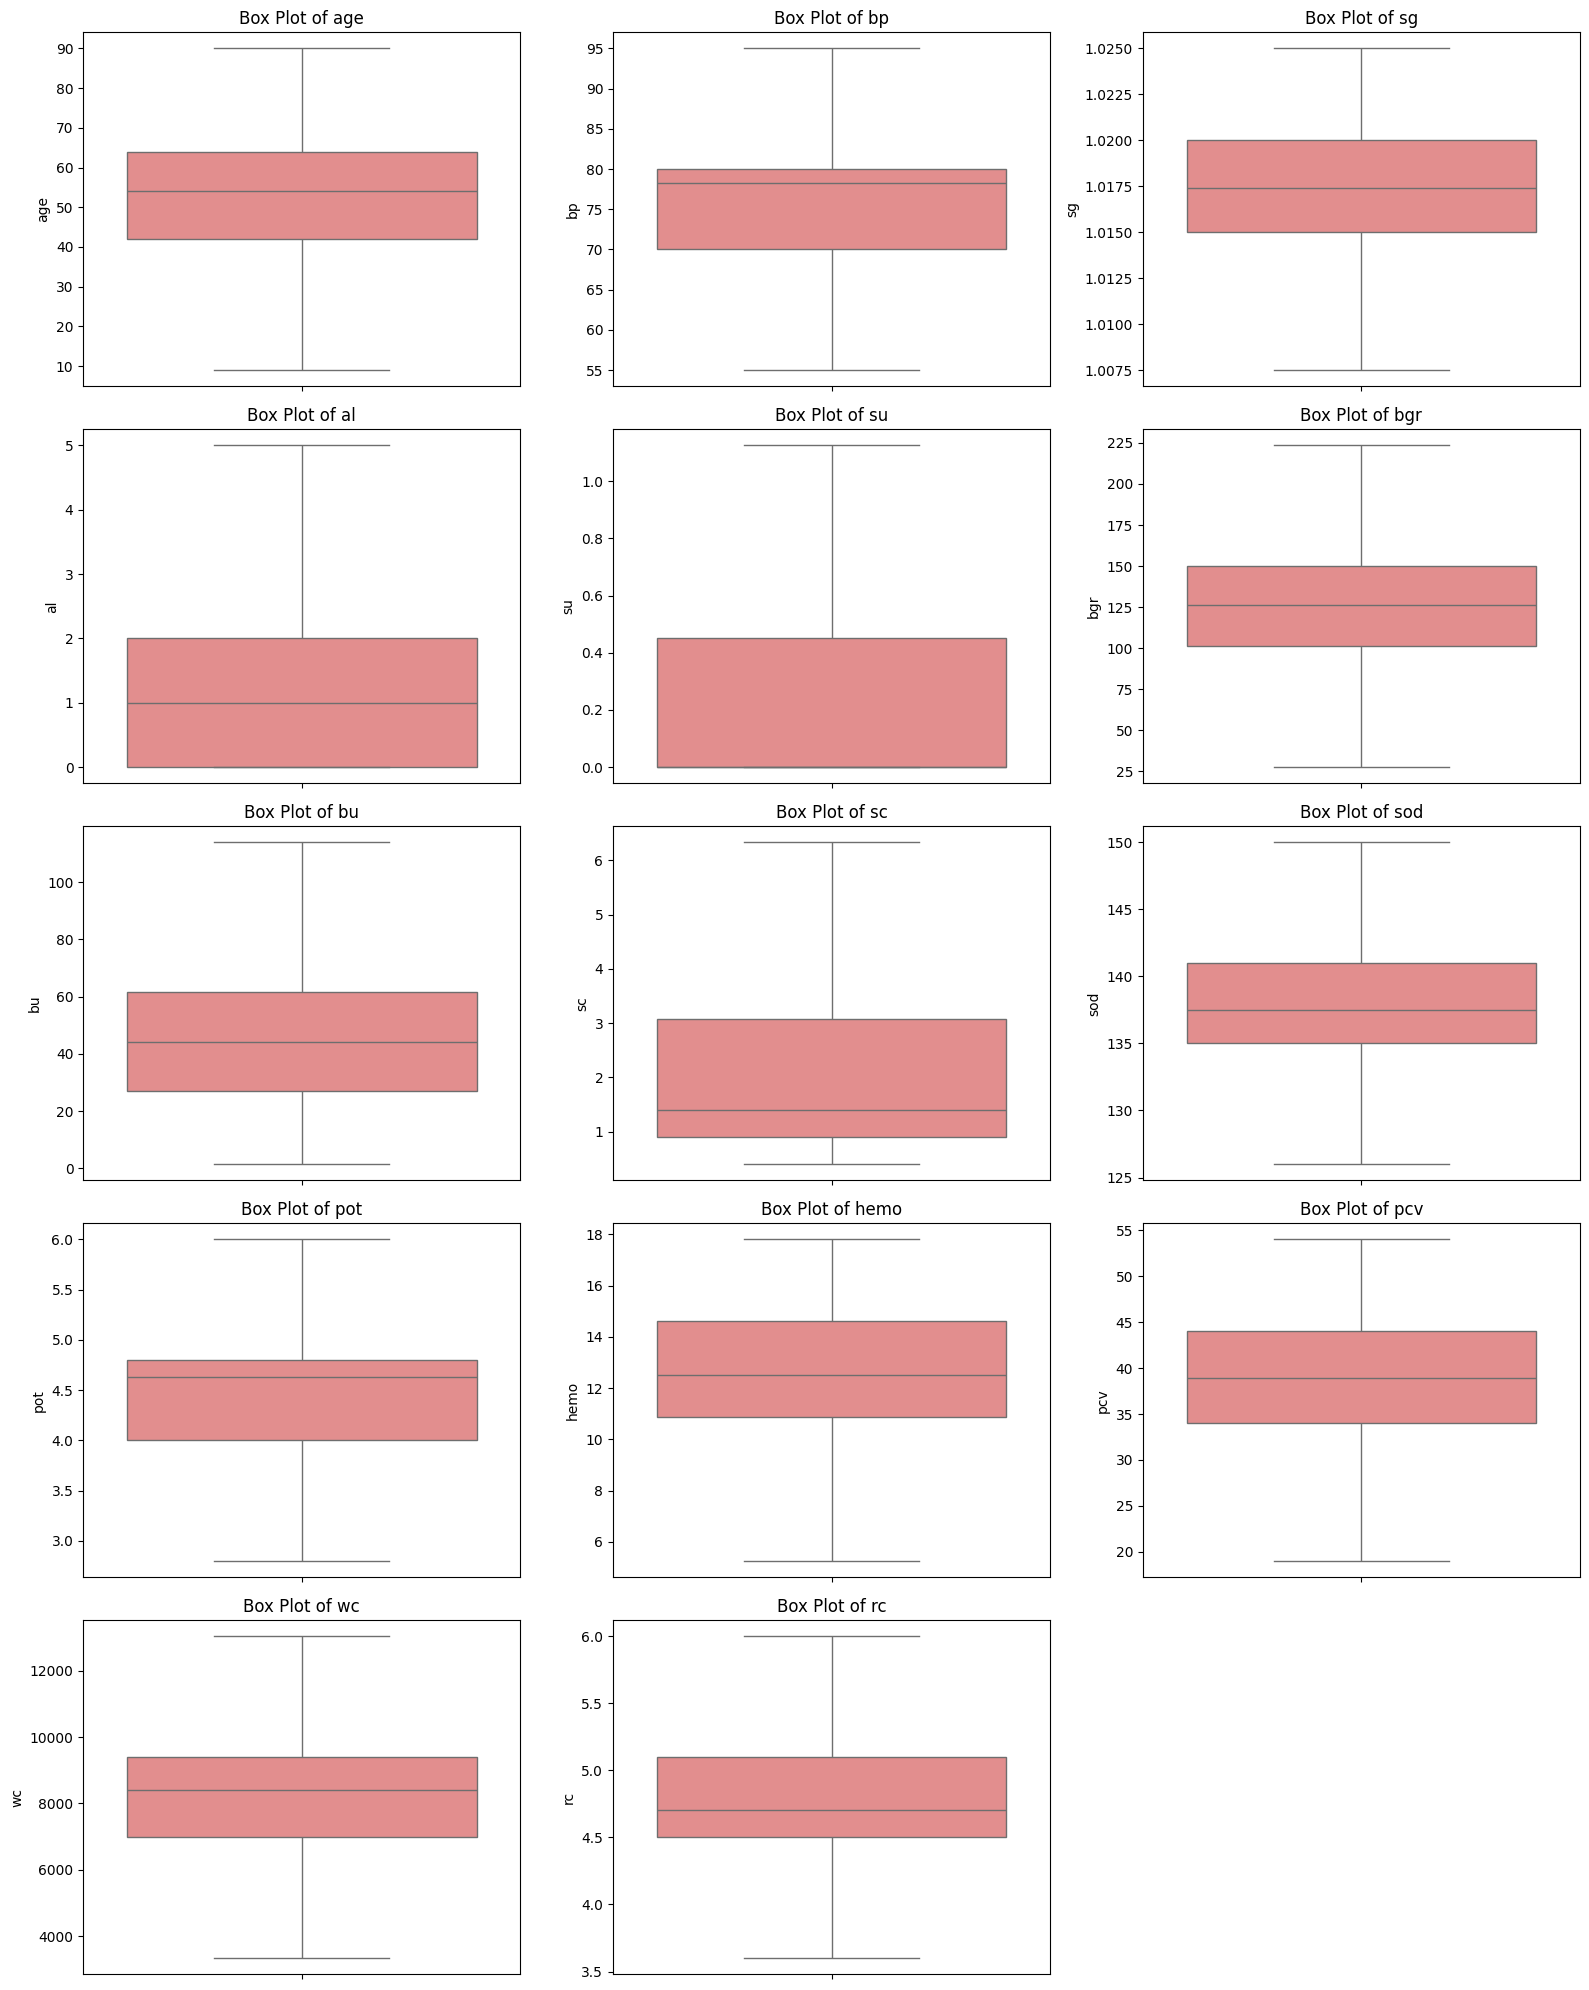

In [21]:
plt.figure(figsize=(16, 4 * num_rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(data=df, y=col, color='lightcoral')
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()

- Bivariate plots to visualize how each feature relates to the target variable. We will use box plots and categorical features, and scatter plots for numerical features.

<Figure size 1600x2000 with 0 Axes>

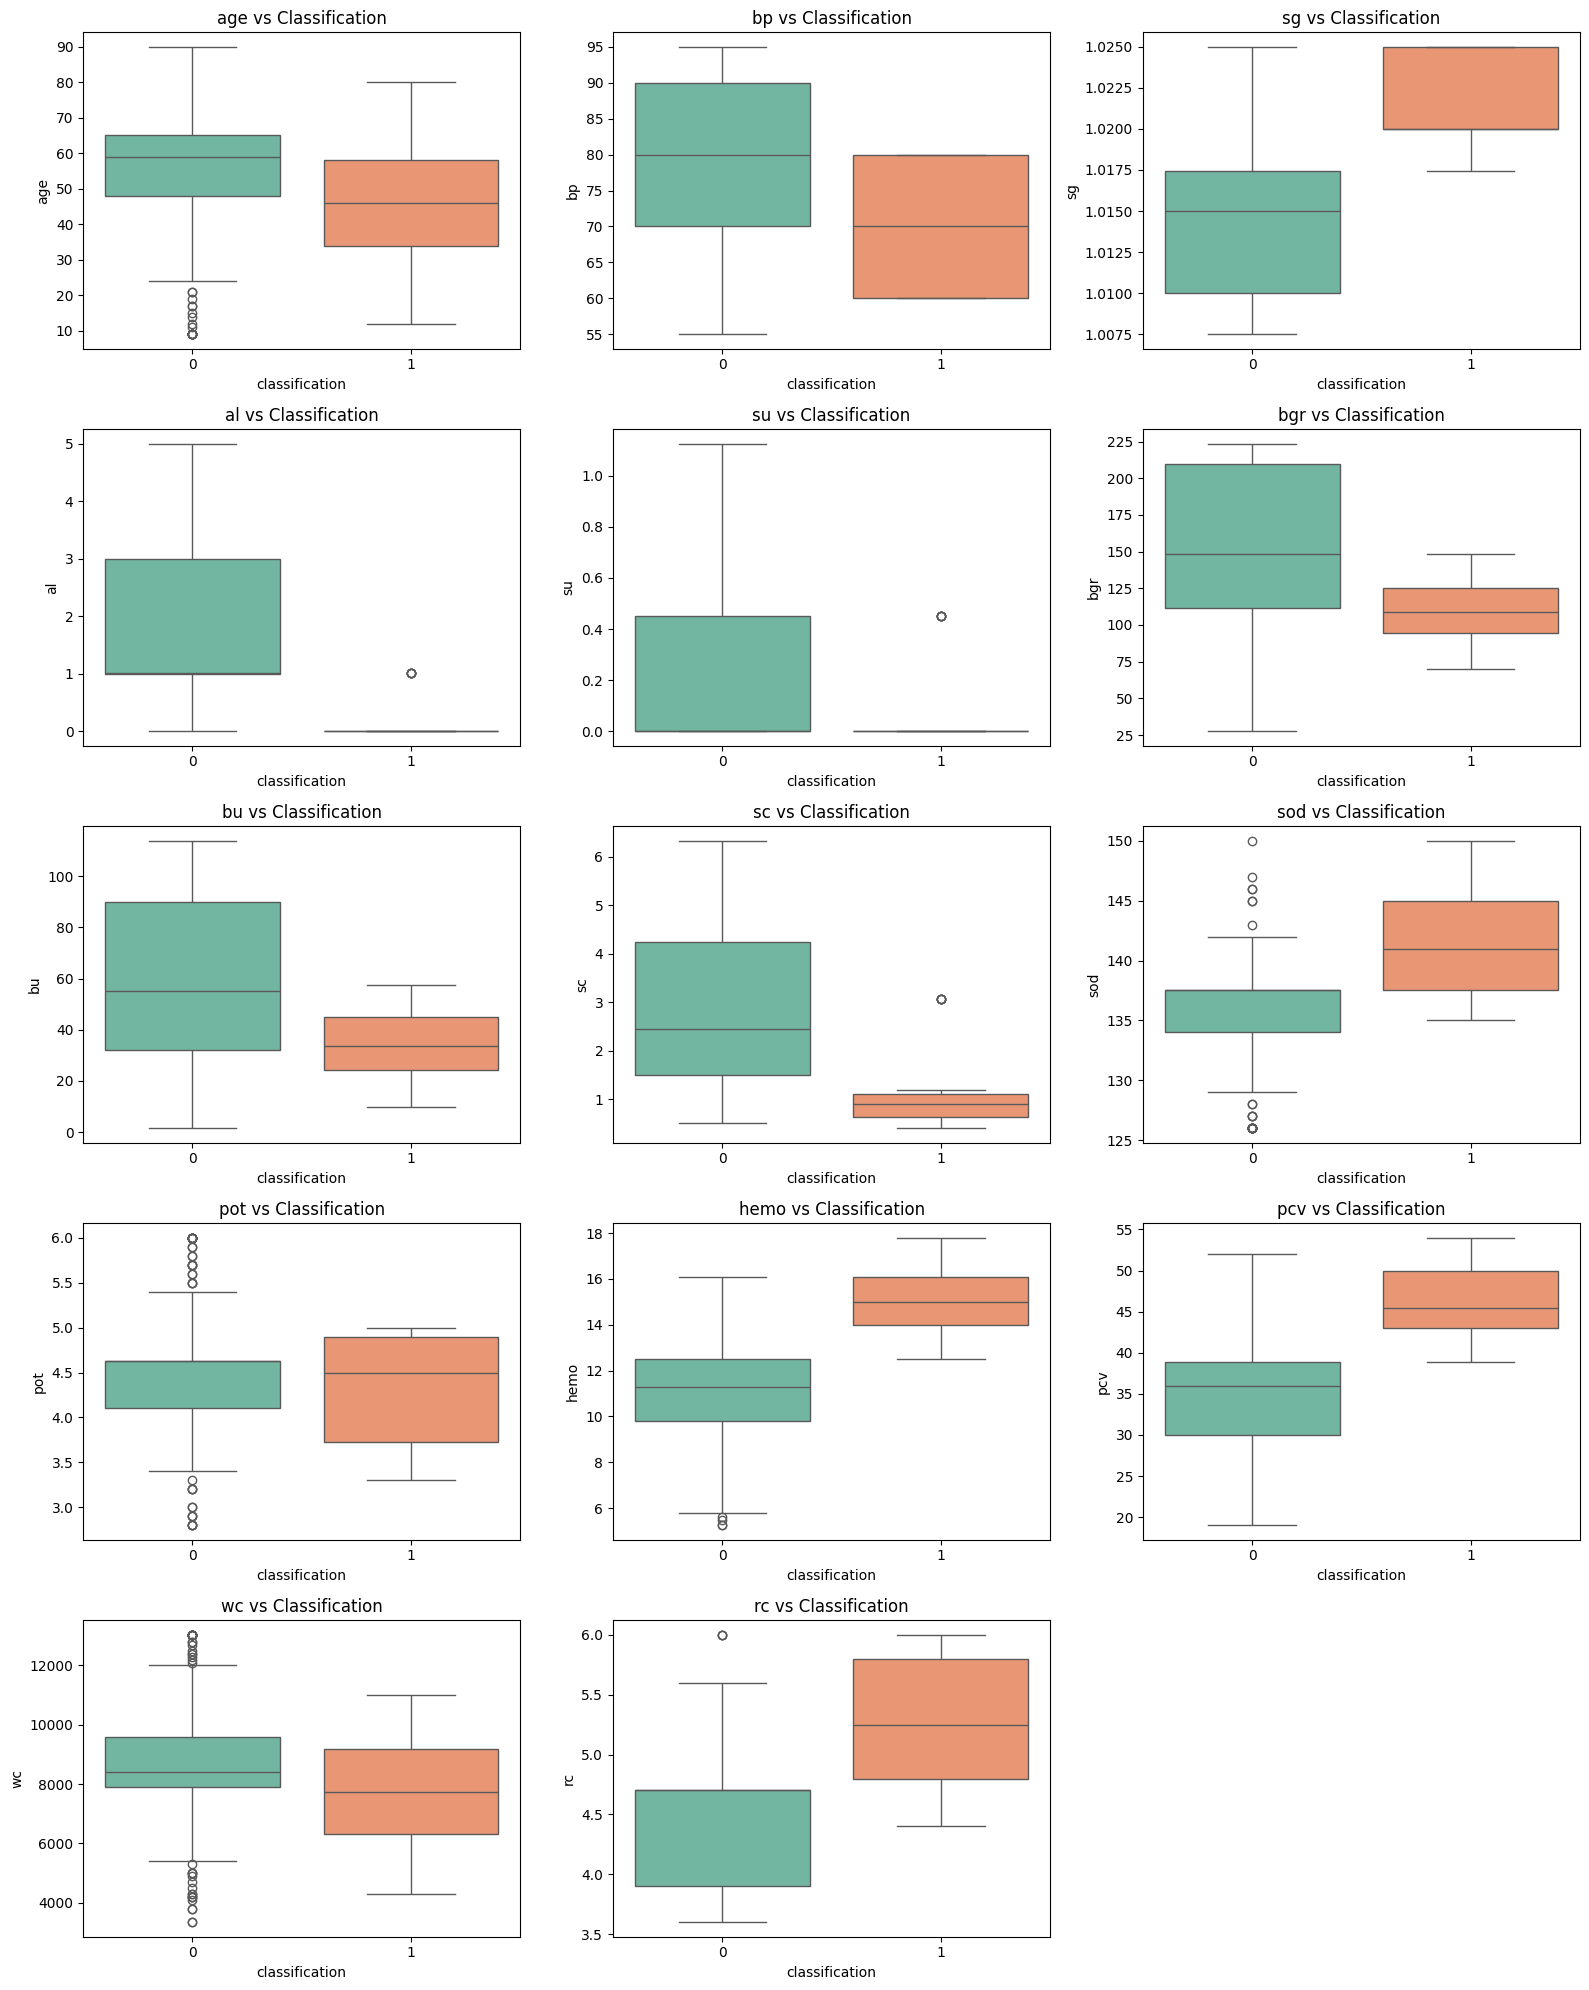

In [22]:
cat_cols = df.select_dtypes(include="object").columns

plt.figure(figsize=(16, 4*num_rows))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(num_rows, 3, i)
    sns.countplot(data=df, x=col, hue="classification", palette="Set2")
    plt.title("{col} vs Classification")
    plt.tight_layout()

# Bivariate plots for numerical features
num_cols = df.select_dtypes(include="float64").columns

plt.figure(figsize=(16, 4*num_rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(data=df, x="classification", y=col, palette="Set2")
    plt.title(f"{col} vs Classification")
    plt.tight_layout()

Text(0.5, 1.0, 'Correlation Matrix')

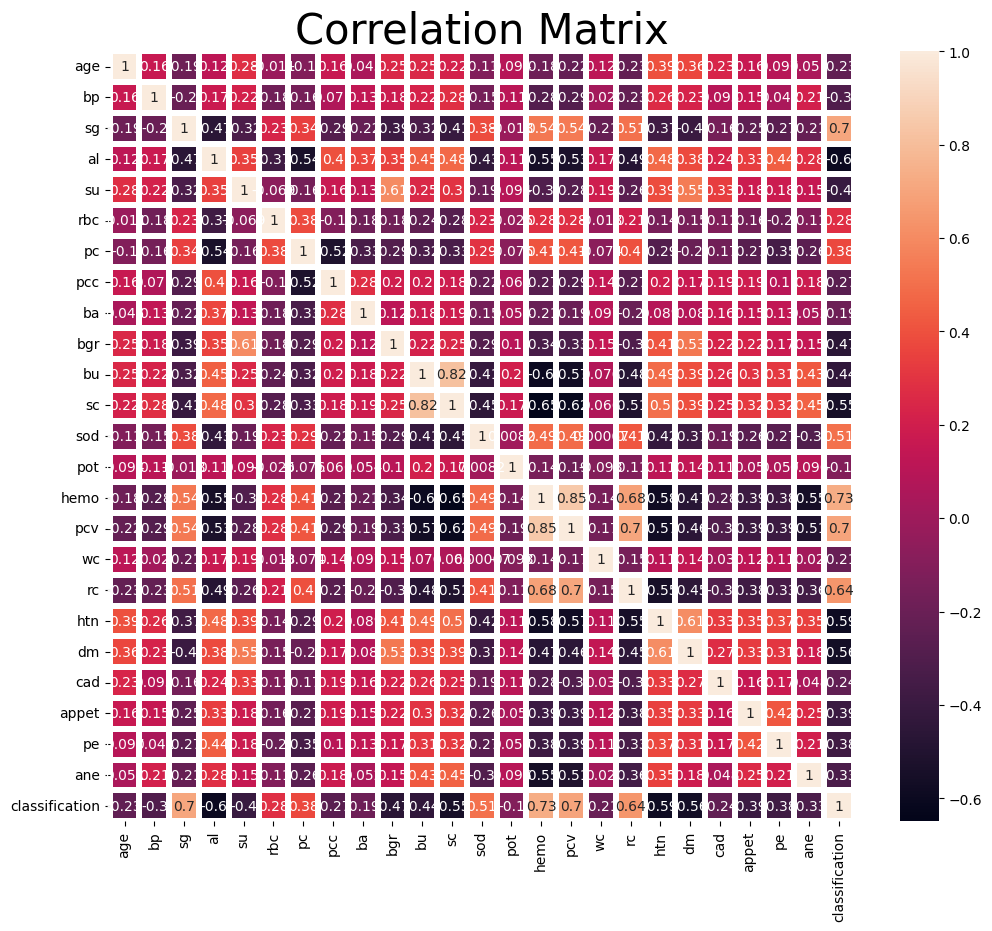

In [23]:
corr_matrix=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True,fmt='.2g',linewidths=4)
plt.title('Correlation Matrix',fontsize=30)


In [24]:
x=df.drop("classification",axis=1)
y=df["classification"]

In [25]:
scale=StandardScaler()
x_scale=scale.fit_transform(x)


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.2,random_state=42)

In [27]:
log_reg=LogisticRegression()
rf_clf=RandomForestClassifier()
svc=SVC()

In [28]:
columns=["LogisticRegression","RandomForestClassifier","SVC"]
models=[log_reg,rf_clf,svc]

train_score=[]
test_score=[]
rec_score=[]
f_score=[]

In [29]:

def evaluate_model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy_test=accuracy_score(y_test,y_pred)*100
    accuracy_train=model.score(x_train,y_train)*100
    recall_result=recall_score(y_test,y_pred)*100
    f1_result=f1_score(y_test,y_pred)*100

    test_score.append(accuracy_test)
    train_score.append(accuracy_train)
    rec_score.append(recall_result)
    f_score.append(f1_result)

    print("Accuracy after train the model is :",accuracy_train)
    print("Accuracy after test the model is :",accuracy_test)
    print("Result recall score is :",recall_result)
    print("Result F1 score is :",f1_result)

for name,model in zip(columns,models):
  print(f"Evaluating {name}")
  evaluate_model(model)





Evaluating LogisticRegression
Accuracy after train the model is : 100.0
Accuracy after test the model is : 100.0
Result recall score is : 100.0
Result F1 score is : 100.0
Evaluating RandomForestClassifier
Accuracy after train the model is : 100.0
Accuracy after test the model is : 100.0
Result recall score is : 100.0
Result F1 score is : 100.0
Evaluating SVC
Accuracy after train the model is : 100.0
Accuracy after test the model is : 100.0
Result recall score is : 100.0
Result F1 score is : 100.0
